<a href="https://colab.research.google.com/github/LaviJ/Cryptocurrency-Analysis/blob/hourly-ML2/Machine%20Learning/model-predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

16384/6656 [=========================================================================] - 0s 0s/step


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


16384/6808 [========================================================================] - 0s 0s/step


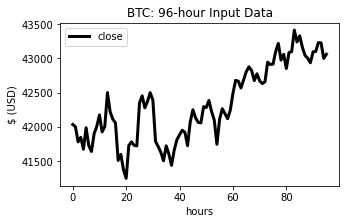

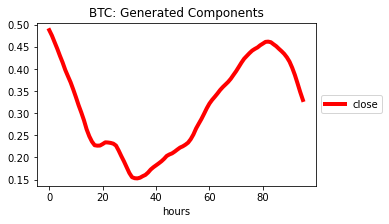

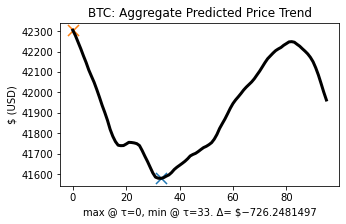

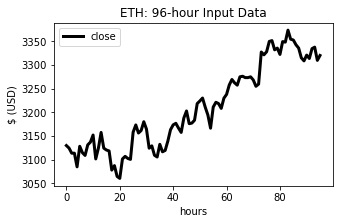

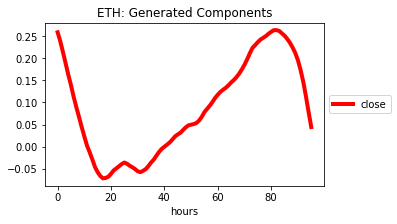

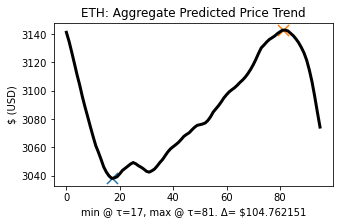

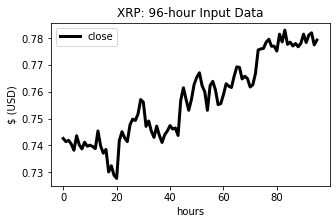

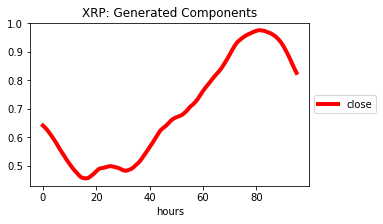

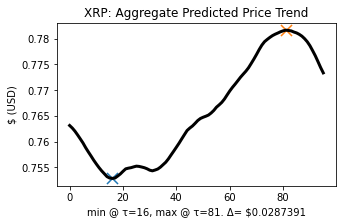

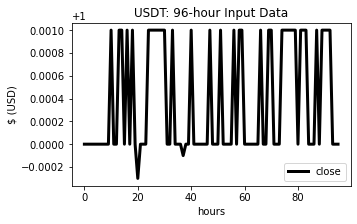

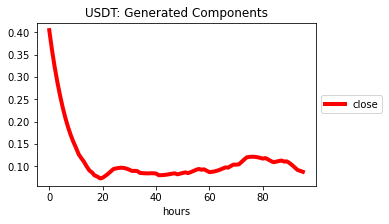

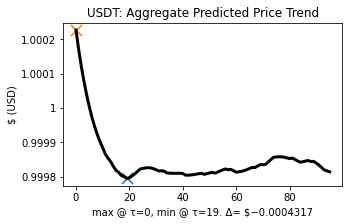

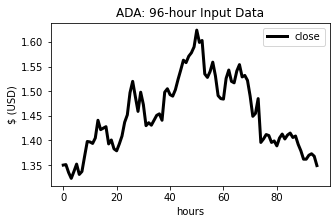

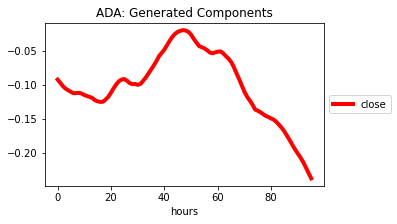

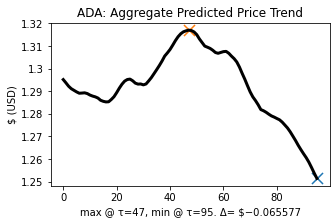

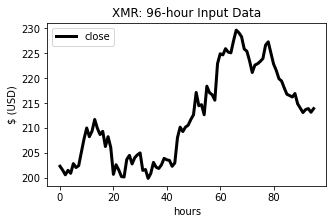

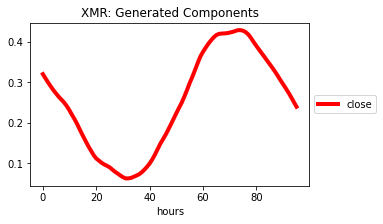

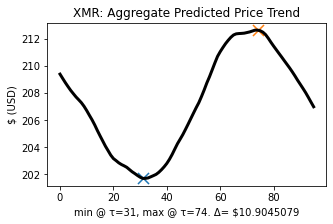

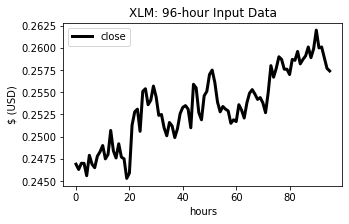

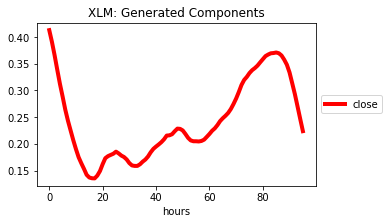

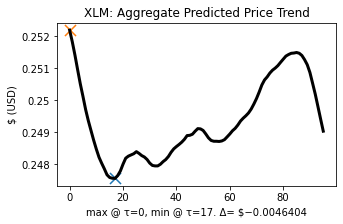

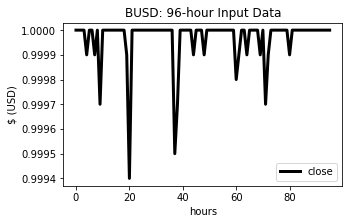

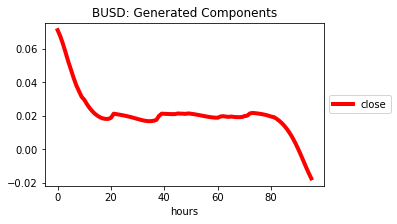

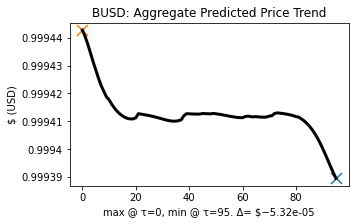

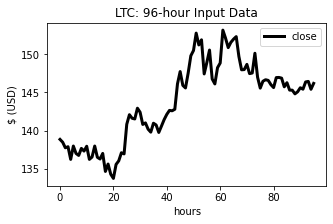

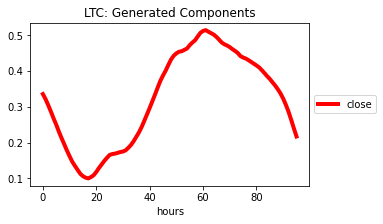

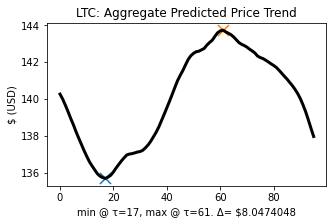

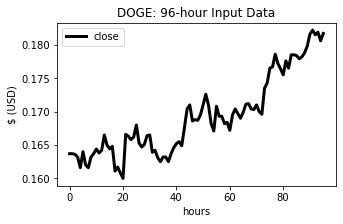

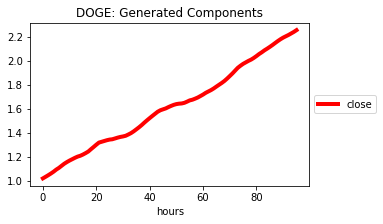

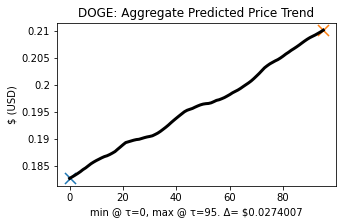

In [52]:
# Forcasting Cryptocurrency
# Data Analysis and Visualization
# Group 7

# TensorFlow model prediction routine

import os
import datetime
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import pandas as pd
import seaborn as sns

 
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
tf.config.experimental.set_memory_growth(physical_devices[1], enable=True)

# Declare the ticker symbols
symbols=['BTC','ETH','XRP','USDT','ADA','XMR','XLM','BUSD','LTC','DOGE']

test_ordinal= '4'

whichmodel = 'bidir_model'

# Declare the dataframes
train_df = test_df = val_df = df = pd.DataFrame()

class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state
  
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
              train_df=train_df, val_df=val_df, test_df=test_df,
              label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                          enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

# Generate the predictions

for symbol in symbols:

    df = pd.DataFrame()
    # Load the trained tensorflow model
    # 
    CONV_WIDTH = 3
    themodel = keras.models.load_model(symbol+whichmodel)

    # Use Keras to get the data file
    path = tf.keras.utils.get_file(
        origin='https://raw.githubusercontent.com/LaviJ/Cryptocurrency-Analysis/main/Data/Hourly/Test'+test_ordinal+'/test'+test_ordinal+'_'+symbol+'.csv',
        fname='test'+test_ordinal+'_'+symbol+'.csv')
    csv_path, _ = os.path.splitext(path)

    # Read data into dataframe
    df = pd.read_csv(csv_path+".csv")

    # Drop some columns
    df = df.drop('conversionType', axis=1)
    df = df.drop('conversionSymbol', axis=1)
    df = df.drop('volumeto', axis=1)
    df = df.drop('volumefrom', axis=1)
    df = df.drop('open', axis=1)
    df = df.drop('high', axis=1)
    df = df.drop('low', axis=1)
    #df = df.drop('close', axis=1)
    old=np.zeros(96)

    old=df['close']
    # Drop row with any zero
    df = df[(df != 0).all(1)]

    # Drop last row
    df = df[:-1]

    # Move the timestamps into an array
    date_time =[0]
    date_time = df.pop('time')

    WindowGenerator.train = train
    WindowGenerator.val = val
    WindowGenerator.test = test
    WindowGenerator.example = example
    FeedBack.warmup = warmup
    FeedBack.call = call

    column_indices = {name: i for i, name in enumerate(df.columns)}

    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]

    num_features = df.shape[1]

    MAX_EPOCHS = 11
    OUT_STEPS = 96
     
    multi_window = WindowGenerator(input_width=96,
                                  label_width=OUT_STEPS,
                                  shift=OUT_STEPS)
    multi_window

    # Show the input data
    df.plot(legend=True, figsize=(5,3), xlabel='hours', ylabel='$ (USD)', color='k', title=symbol+': 96-hour Input Data', lw=3)
    plt.savefig('pngs/'+symbol+'in.png',bbox_inches='tight',dpi=150)
 
    # normalize dataset with MinMaxScaler
    last = df['close'][95]
    mean = np.mean(df['close'])
    std = np.std(df['close'])
    scaler = MinMaxScaler(feature_range=(0, 1))
 
    df  = scaler.fit_transform(df )


   # print(x)

    # Run feedback model prediction on input data
    all = pd.DataFrame()
    first = np.zeros(96)
    for iter in range(96):
      x = tf.convert_to_tensor(    df[:]  )
      x = tf.expand_dims(x, 0, name="inputs")
      x = tf.ensure_shape(x, [1, 96, 1])
      with tf.device('/device:GPU:0'):
        answer = themodel.predict(x)
      for slide in range(95):
        df [slide]=df [slide+1]
      df[95]=answer[0][0]

    # Put the answer into a dataframe
    final = pd.DataFrame( )
    final = pd.DataFrame(df)

    # Show the raw componenet output
    final.columns = [ 'close']#,	'Annual sin',	'Annual cos', 'Daily sin', 'Daily cos']   #,	'Weekly sin',	
    '''  'Weekly cos',	'Biweekly sin',	'Biweekly cos',	
                     'Quarterly sin',	'Quarterly cos',	'Annual sin',	'Annual cos']'''
    final.plot(legend=True, figsize=(5,3), xlabel='hours', colormap='prism', title=symbol+': Generated Components', lw=4)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.savefig('pngs/'+symbol+'raw.png',bbox_inches='tight',dpi=150)

    # Denormalize

    final =  scaler.inverse_transform(final)

 
    # Plot the aggregate prediction
    a=pd.DataFrame()
    a=pd.DataFrame(final)

 

    ymin = float(np.min(a))
    xmin = int(np.where(a == ymin)[0][0])
    ymax = float(np.max(a))
    xmax = int(np.where(a == ymax)[0][0])
    if xmin < xmax :
        a.plot(legend=False, figsize=(5,3), xlabel='min @ \u03C4='+str(xmin)+', max @ \u03C4='+str(xmax)+'. \u0394= $'+str(round(ymax-ymin,7)), ylabel='$ (USD)', color='k', title=symbol+": Aggregate Predicted Price Trend", lw=3)
    else:
        a.plot(legend=False, figsize=(5,3), xlabel='max @ \u03C4='+str(xmax)+', min @ \u03C4='+str(xmin)+'. \u0394= $\u2212'+str(abs(round(ymin-ymax,7))), ylabel='$ (USD)', color='k', title=symbol+": Aggregate Predicted Price Trend", lw=3)


    plt.gca().scatter(xmin, ymin, s=123, marker='x')
    plt.gca().scatter(xmax, ymax, s=123, marker='x')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
    plt.savefig('pngs/'+symbol+'out.png', bbox_inches='tight', dpi=150)


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
 


Some code adapted from ` Tensorflow Routines for Time Series Data`
https://www.tensorflow.org/tutorials/structured_data/time_series

Citation:

>`TensorFlow: Large-scale machine learning on heterogeneous systems,`
`2015. Software available from tensorflow.org.`  Martín Abadi, Ashish Agarwal, Paul Barham, Eugene Brevdo,
Zhifeng Chen, Craig Citro, Greg S. Corrado, Andy Davis,
Jeffrey Dean, Matthieu Devin, Sanjay Ghemawat, Ian Goodfellow,
Andrew Harp, Geoffrey Irving, Michael Isard, Rafal Jozefowicz, Yangqing Jia,
Lukasz Kaiser, Manjunath Kudlur, Josh Levenberg, Dan Mané, Mike Schuster,
Rajat Monga, Sherry Moore, Derek Murray, Chris Olah, Jonathon Shlens,
Benoit Steiner, Ilya Sutskever, Kunal Talwar, Paul Tucker,
Vincent Vanhoucke, Vijay Vasudevan, Fernanda Viégas,
Oriol Vinyals, Pete Warden, Martin Wattenberg, Martin Wicke,
Yuan Yu, and Xiaoqiang Zheng.

